<a href="https://colab.research.google.com/github/EidenValentine/Prueba1/blob/main/Unidad10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unidad 10.
Trabajo de analisis de datos financioeros del peso colombiano.

Cargue y visualización de datos


##1. Cargar el dataset disponible en https://www.datos.gov.co/Econom-a-y-Finanzas/Tasa-de-Cambio-Representativa-del-Mercado-TRM/32sa-8pi3/explore


In [9]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [11]:
df_1= pd.read_csv('/content/Tasa_de_Cambio_Representativa_del_Mercado-_TRM.csv')
df_1.head()

,VALOR,UNIDAD,VIGENCIADESDE,VIGENCIAHASTA
0,4761.64,COP,22/12/2022,22/12/2022
1,4781.28,COP,20/12/2022,20/12/2022
2,4802.48,COP,17/12/2022,19/12/2022
3,4836.24,COP,13/12/2022,13/12/2022
4,4815.99,COP,10/12/2022,12/12/2022


In [12]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7570 entries, 0 to 7569
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   VALOR          7570 non-null   float64
 1   UNIDAD         7570 non-null   object 
 2   VIGENCIADESDE  7570 non-null   object 
 3   VIGENCIAHASTA  7570 non-null   object 
dtypes: float64(1), object(3)
memory usage: 236.7+ KB


In [13]:
tipo_datos_fecha = df_1['VIGENCIADESDE'].dtype
print("Tipo de datos de la columna VIGENCIADESDE: ", tipo_datos_fecha)

Tipo de datos de la columna VIGENCIADESDE:  object


In [14]:
tipo_datos_fecha = df_1['VIGENCIAHASTA'].dtype
print("Tipo de datos de la columna VIGENCIAHASTA: ", tipo_datos_fecha)

Tipo de datos de la columna VIGENCIAHASTA:  object


In [10]:
df_1['VIGENCIADESDE'] = pd.to_datetime(df_1['VIGENCIADESDE'])

<ipython-input-10-6c0e568a72c8>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_1['VIGENCIADESDE'] = pd.to_datetime(df_1['VIGENCIADESDE'])


In [11]:
df_1['VIGENCIAHASTA'] = pd.to_datetime(df_1['VIGENCIAHASTA'])

<ipython-input-11-24e22dbe6354>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_1['VIGENCIAHASTA'] = pd.to_datetime(df_1['VIGENCIAHASTA'])


In [12]:
fecha_minima = df_1['VIGENCIADESDE'].min()
fecha_maxima = df_1['VIGENCIADESDE'].max()
print("Fecha minima: ", fecha_minima)
print("Fecha maxima: ", fecha_maxima)

Fecha minima:  1991-02-12 00:00:00
Fecha maxima:  2023-12-05 00:00:00


In [13]:
df_1.rename(columns={'VIGENCIADESDE': 'DESDE'}, inplace=True)
df_1.rename(columns={'VIGENCIAHASTA': 'HASTA'}, inplace=True)

In [14]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7570 entries, 0 to 7569
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   VALOR   7570 non-null   float64       
 1   UNIDAD  7570 non-null   object        
 2   DESDE   7570 non-null   datetime64[ns]
 3   HASTA   7570 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 236.7+ KB


In [15]:
df_1['Diferencia Porcentual'] = ((df_1['VALOR'] - df_1['VALOR'].shift(1)) / df_1['VALOR'].shift(1)) * 100

In [16]:
df_1.head()

,VALOR,UNIDAD,DESDE,HASTA,Diferencia Porcentual
0,4761.64,COP,2022-12-22,2022-12-22,NaN
1,4781.28,COP,2022-12-20,2022-12-20,0.412463
2,4802.48,COP,2022-12-17,2022-12-19,0.443396
3,4836.24,COP,2022-12-13,2022-12-13,0.702970
4,4815.99,COP,2022-10-12,2022-12-12,-0.418714


In [17]:
df_1.rename(columns={'Diferencia Porcentual': 'Dif_%'}, inplace=True)

In [18]:
df_1.head()

,VALOR,UNIDAD,DESDE,HASTA,Dif_%
0,4761.64,COP,2022-12-22,2022-12-22,NaN
1,4781.28,COP,2022-12-20,2022-12-20,0.412463
2,4802.48,COP,2022-12-17,2022-12-19,0.443396
3,4836.24,COP,2022-12-13,2022-12-13,0.702970
4,4815.99,COP,2022-10-12,2022-12-12,-0.418714


In [19]:
df_1.isnull()

,VALOR,UNIDAD,DESDE,HASTA,Dif_%
0,False,False,False,False,True
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
7565,False,False,False,False,False
7566,False,False,False,False,False
7567,False,False,False,False,False
7568,False,False,False,False,False


In [20]:
df_1 = df_1.dropna(axis=0, how="any")
df_1.fillna(value=0)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7569 entries, 1 to 7569
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   VALOR   7569 non-null   float64       
 1   UNIDAD  7569 non-null   object        
 2   DESDE   7569 non-null   datetime64[ns]
 3   HASTA   7569 non-null   datetime64[ns]
 4   Dif_%   7569 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(1)
memory usage: 354.8+ KB


In [21]:
df_1.head()

,VALOR,UNIDAD,DESDE,HASTA,Dif_%
1,4781.28,COP,2022-12-20,2022-12-20,0.412463
2,4802.48,COP,2022-12-17,2022-12-19,0.443396
3,4836.24,COP,2022-12-13,2022-12-13,0.702970
4,4815.99,COP,2022-10-12,2022-12-12,-0.418714
5,4818.32,COP,2022-07-12,2022-07-12,0.048380


## 2. Calcular : Media

In [22]:
df_1.VALOR.mean()

2208.1366851631656

##3. Calcular: Mediana

In [23]:
df_1.VALOR.median()

2158.36

##4. Calcular: Desviasión Estandar

In [24]:
df_1.VALOR.std()

945.2996299570166

##5. Calcular: Máximo

In [25]:
df_1.VALOR.max()

5061.21

##6. Calcular: Mínimo

In [26]:
df_1.VALOR.min()

620.62

##7. Calcular: Rango

In [27]:
df_1.rank(method="min")

,VALOR,UNIDAD,DESDE,HASTA,Dif_%
1,7511.0,1.0,7467.0,7467.0,5952.0
2,7516.0,1.0,7466.0,7466.0,6042.0
3,7535.0,1.0,7462.0,7462.0,6520.0
4,7527.0,1.0,7425.0,7461.0,1604.0
5,7528.0,1.0,7361.0,7362.0,4171.0
...,...,...,...,...,...
7565,7432.0,1.0,7543.0,7543.0,4911.0
7566,7424.0,1.0,7544.0,7544.0,1198.0
7567,7409.0,1.0,7545.0,7545.0,594.0
7568,7415.0,1.0,7546.0,7546.0,6171.0


##B. Presentar el resumen de los datos numéricos

In [28]:
df_1.describe()

,VALOR,Dif_%
count,7569.000000,7569.000000
mean,2208.136685,0.424572
std,945.299630,11.877291
min,620.620000,-86.769648
25%,1751.000000,-0.322169
50%,2158.360000,0.004989
75%,2866.870000,0.322433
max,5061.210000,659.301856


In [29]:
df_1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7569 entries, 1 to 7569
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   VALOR   7569 non-null   float64       
 1   UNIDAD  7569 non-null   object        
 2   DESDE   7569 non-null   datetime64[ns]
 3   HASTA   7569 non-null   datetime64[ns]
 4   Dif_%   7569 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(1)
memory usage: 354.8+ KB


##Análisis del Data set
se examina los datos para entender su naturaleza y cómo están estructurados. Luego, se hace preguntas para obtener más información sobre el contexto y el propósito del análisis en el cual se ve que al pasarlos a maquina todos son objeto, se realiza limpieza y grafica para dar como resultado que da que la moneda tuvo un alza desde el 2012 hasta el 2023 de casi 935 pesos.

##C. Presentar la información general del dataset

In [30]:
df_1.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7569 entries, 1 to 7569
Columns: 5 entries, VALOR to Dif_%
dtypes: datetime64[ns](2), float64(2), object(1)
memory usage: 354.8+ KB


## D. Hacer dos representaciones graficas que sean acordes a la naturaleza de los datos

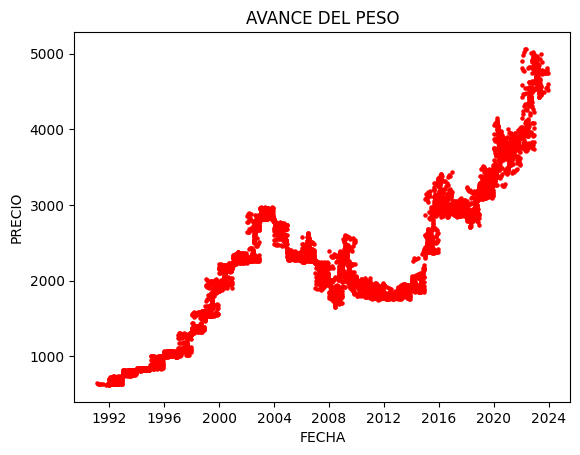

In [31]:
df_1.plot(kind = 'scatter', y = 'VALOR', x = 'DESDE',title = 'AVANCE DEL PESO',
                xlabel = 'FECHA',
                ylabel = 'PRECIO',
                s = 5,
                c = 'red');

plt.show()

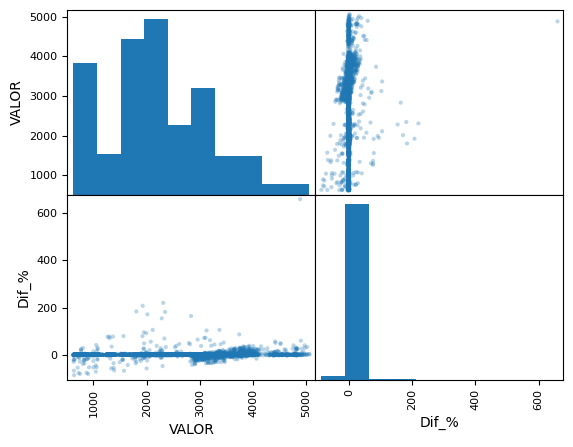

In [45]:
pd.plotting.scatter_matrix(df_1, alpha=0.3)

plt.show()

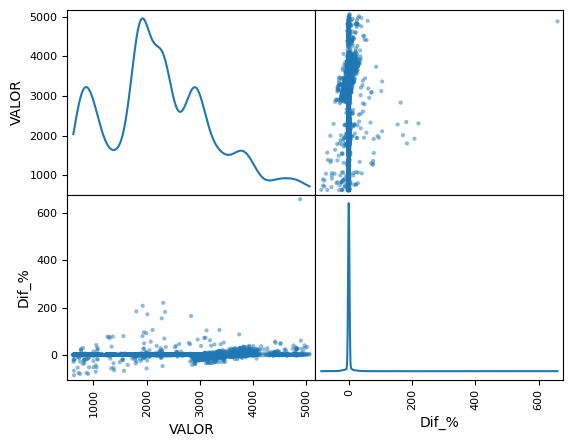

In [50]:
pd.plotting.scatter_matrix(df_1, diagonal='kde')

plt.show()

Text(0.5, 1.0, 'Variación de la Moneda colombiana')

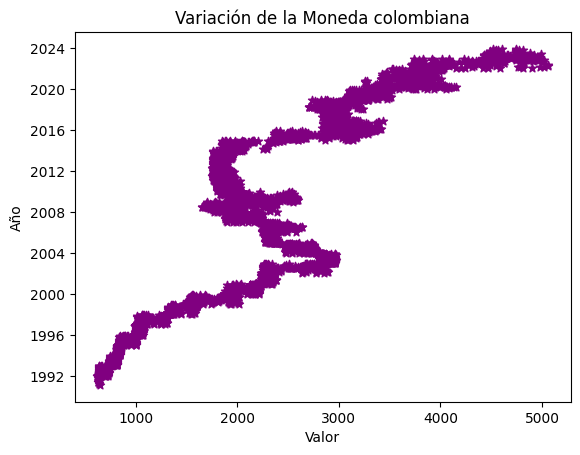

In [48]:
plt.scatter(x='VALOR', y='DESDE', color='purple', marker='*', data=df_1)
plt.xlabel('Valor')
plt.ylabel('Año')
plt.title('Variación de la Moneda colombiana')

Text(0.5, 1.0, 'Alza de la Moneda colombiana')

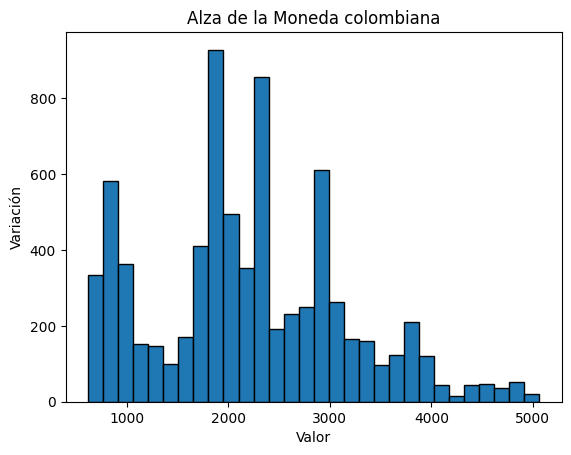

In [52]:
plt.hist(x=df_1.VALOR, bins=30, edgecolor='black')
plt.xlabel('Valor')
plt.ylabel('Variación')
plt.title('Alza de la Moneda colombiana')

Text(0.5, 1.0, 'Grafica de dispersión de la Moneda colombiana')

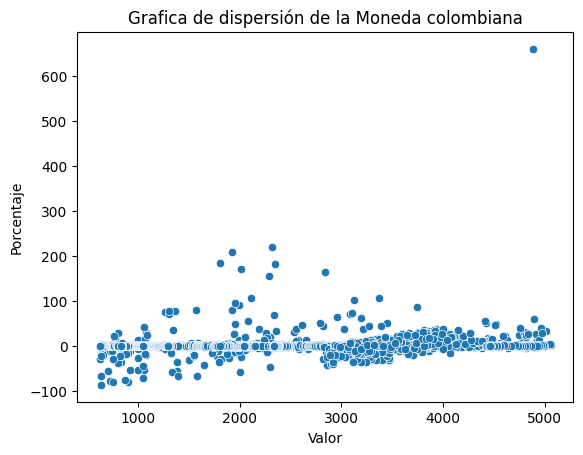

In [54]:
sns.scatterplot(x='VALOR',y='Dif_%', data=df_1)
plt.xlabel('Valor')
plt.ylabel('Porcentaje')
plt.title('Grafica de dispersión de la Moneda colombiana')

In [55]:

print(df_1.head(1))

     VALOR UNIDAD      DESDE      HASTA     Dif_%
1  4781.28    COP 2022-12-20 2022-12-20  0.412463


In [57]:
print(df_1.tail())

        VALOR UNIDAD      DESDE      HASTA     Dif_%
7565  4528.67    COP 2023-05-20 2023-05-23  0.155475
7566  4501.81    COP 2023-05-24 2023-05-24 -0.593110
7567  4448.93    COP 2023-05-25 2023-05-25 -1.174639
7568  4470.83    COP 2023-05-26 2023-05-26  0.492253
7569  4461.66    COP 2023-05-27 2023-05-30 -0.205107


## E.  Usando Socrata, Cargue un dataset que se encuentre en el portal de datos públicos de Colombia

In [15]:
%pip install sodapy
from sodapy import Socrata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
from pandas.io.formats import info
client = Socrata("www.datos.gov.co",None)
results = client.get("aw5z-tew6")
datos = pd.DataFrame.from_records(results)

socrata_domain = "www.datos.gov.co"
socrata_dataset_identifier = 'aw5z-tew6'
client = Socrata(socrata_domain, app_token="dihJJCaYsS1BlCLhHdZtpv00E")
results = client.get(socrata_dataset_identifier)

df = pd.DataFrame(results)

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   entidad                         450 non-null    object
 1   nit_entidad                     450 non-null    object
 2   departamento_entidad            450 non-null    object
 3   ciudad_entidad                  450 non-null    object
 4   ordenentidad                    450 non-null    object
 5   codigo_pci                      450 non-null    object
 6   id_del_proceso                  450 non-null    object
 7   referencia_del_proceso          450 non-null    object
 8   ppi                             450 non-null    object
 9   id_del_portafolio               450 non-null    object
 10  nombre_del_procedimiento        449 non-null    object
 11  descripci_n_del_procedimiento   449 non-null    object
 12  fase                            450 non-null    ob

,entidad,nit_entidad,departamento_entidad,ciudad_entidad,ordenentidad,codigo_pci,id_del_proceso,referencia_del_proceso,ppi,id_del_portafolio,...,estado_de_apertura_del_proceso,tipo_de_contrato,subtipo_de_contrato,categorias_adicionales,urlproceso,fecha_de_publicacion_fase_2,fecha_de_recepcion_de,fecha_de_apertura_de_respuesta,fecha_de_apertura_efectiva,fecha_adjudicacion
0,MUNICIPIO DE YOPAL,891855017,Casanare,Yopal,Territorial,No,CO1.REQ.1471256,MYCA-SE-CD-166-2020,ND,CO1.BDOS.1427948,...,Abierto,Servicios de aprovisionamiento,No Especificado,ND,{'url': 'https://community.secop.gov.co/Public...,NaN,NaN,NaN,NaN,NaN
1,MUNICIPIO DE YOPAL,891855017,Casanare,Yopal,Territorial,No,CO1.REQ.1473147,MYCA-SS-CD-026-2020,ND,CO1.BDOS.1428914,...,Abierto,Servicios de aprovisionamiento,No Especificado,ND,{'url': 'https://community.secop.gov.co/Public...,NaN,NaN,NaN,NaN,NaN
2,MUNICIPIO DE YOPAL,891855017,Casanare,Yopal,Territorial,No,CO1.REQ.1469242,MYCA-SE-CD-163-2020,ND,CO1.BDOS.1425864,...,Abierto,Servicios de aprovisionamiento,No Especificado,ND,{'url': 'https://community.secop.gov.co/Public...,NaN,NaN,NaN,NaN,NaN
3,MUNICIPIO DE YOPAL,891855017,Casanare,Yopal,Territorial,No,CO1.REQ.1475514,MYCA-SS-CD-027-2020,ND,CO1.BDOS.1431444,...,Abierto,Servicios de aprovisionamiento,No Especificado,ND,{'url': 'https://community.secop.gov.co/Public...,NaN,NaN,NaN,NaN,NaN
4,MUNICIPIO DE YOPAL,891855017,Casanare,Yopal,Territorial,No,CO1.REQ.1475701,MYCA-STT-CD-0037-2020,ND,CO1.BDOS.1431661,...,Abierto,Servicios de aprovisionamiento,No Especificado,ND,{'url': 'https://community.secop.gov.co/Public...,NaN,NaN,NaN,NaN,NaN


##F. Realice las tareas de limpieza y transformación necesarias

In [100]:
df['fecha_adjudicacion'] = pd.to_datetime(df['fecha_adjudicacion'])
df['precio_base'] = df['precio_base'].astype(float)
df['duracion'] = df['duracion'].astype(float)
df = df.drop('fecha_de_apertura_de_respuesta', axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   entidad                         450 non-null    object        
 1   nit_entidad                     450 non-null    object        
 2   departamento_entidad            450 non-null    object        
 3   ciudad_entidad                  450 non-null    object        
 4   ordenentidad                    450 non-null    object        
 5   codigo_pci                      450 non-null    object        
 6   id_del_proceso                  450 non-null    object        
 7   referencia_del_proceso          450 non-null    object        
 8   ppi                             450 non-null    object        
 9   id_del_portafolio               450 non-null    object        
 10  nombre_del_procedimiento        449 non-null    object        
 11  descri

In [74]:
#eliminar datos nulos
df.fillna(value=0)
#df=df.dropna(axis=0, how='any')
df.info()
pd.set_option('display.precision', 2)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   entidad                         450 non-null    object
 1   nit_entidad                     450 non-null    object
 2   departamento_entidad            450 non-null    object
 3   ciudad_entidad                  450 non-null    object
 4   ordenentidad                    450 non-null    object
 5   codigo_pci                      450 non-null    object
 6   id_del_proceso                  450 non-null    object
 7   referencia_del_proceso          450 non-null    object
 8   ppi                             450 non-null    object
 9   id_del_portafolio               450 non-null    object
 10  nombre_del_procedimiento        449 non-null    object
 11  descripci_n_del_procedimiento   449 non-null    object
 12  fase                            450 non-null    ob

,entidad,nit_entidad,departamento_entidad,ciudad_entidad,ordenentidad,codigo_pci,id_del_proceso,referencia_del_proceso,ppi,id_del_portafolio,...,estado_de_apertura_del_proceso,tipo_de_contrato,subtipo_de_contrato,categorias_adicionales,urlproceso,fecha_de_publicacion_fase_2,fecha_de_recepcion_de,fecha_de_apertura_de_respuesta,fecha_de_apertura_efectiva,fecha_adjudicacion
count,450,450,450,450,450,450,450,450,450,450,...,450,450,450,450,450,6,15,14,15,9
unique,1,1,1,1,1,1,450,450,1,446,...,2,8,1,2,450,5,8,10,10,8
top,MUNICIPIO DE YOPAL,891855017,Casanare,Yopal,Territorial,No,CO1.REQ.1471256,MYCA-SE-CD-166-2020,ND,CO1.BDOS.1438015,...,Abierto,Servicios de aprovisionamiento,No Especificado,ND,{'url': 'https://community.secop.gov.co/Public...,2020-09-08T00:00:00.000,2020-10-02T00:00:00.000,2020-10-15T00:00:00.000,2020-10-15T00:00:00.000,2020-10-16T00:00:00.000
freq,450,450,450,450,450,450,1,1,450,2,...,436,436,450,449,1,2,4,3,3,2


In [102]:
df = df.sort_values(by='precio_base', ascending=False)

In [110]:
print(df['duracion'].describe())


count    450.00
mean      36.72
std       46.34
min        2.00
25%        3.00
50%        3.00
75%      100.00
max      140.00
Name: duracion, dtype: float64


##G. Presentar el dataset, mostrando datos estadísticos y gráficas

In [111]:
var=list((df['precio_base']))
precio_base=[]
for i in range(len(var)):
  precio_base.append(int(var[i]))

precio_base_a=np.array(precio_base)
print('la media de los contratos adjudicados son:', np.mean(precio_base_a))

la media de los contratos adjudicados son: 40569894.94


Text(0.5, 1.0, 'Variación de SECOP')

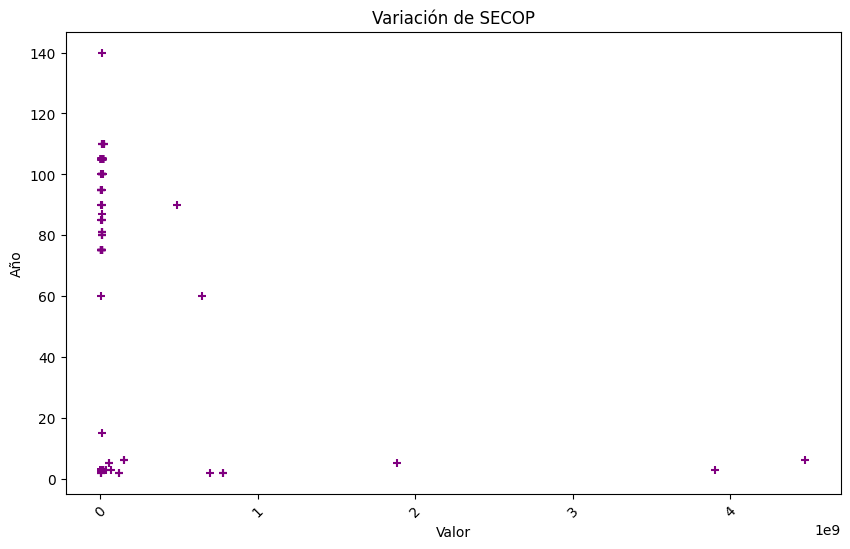

In [112]:
plt.figure(figsize=(10, 6))
plt.scatter(df['precio_base'], df['duracion'], color='purple', marker='+')
plt.xlabel('Valor')
plt.ylabel('Año')
plt.xticks(rotation=45)
plt.title('Variación de SECOP')

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 257 to 0
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   entidad                         450 non-null    object        
 1   nit_entidad                     450 non-null    object        
 2   departamento_entidad            450 non-null    object        
 3   ciudad_entidad                  450 non-null    object        
 4   ordenentidad                    450 non-null    object        
 5   codigo_pci                      450 non-null    object        
 6   id_del_proceso                  450 non-null    object        
 7   referencia_del_proceso          450 non-null    object        
 8   ppi                             450 non-null    object        
 9   id_del_portafolio               450 non-null    object        
 10  nombre_del_procedimiento        449 non-null    object        
 11  descri

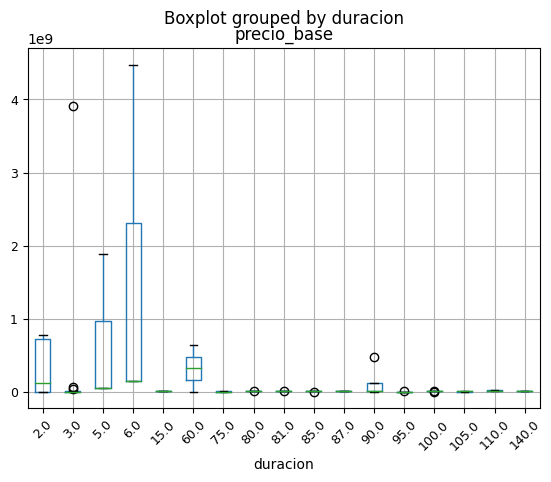

In [106]:
boxplot = df.boxplot(column=['precio_base'],by="duracion", rot=45, fontsize=9)
boxplot.plot()

plt.show()

##Analisis de Grafica
En la anterior grafica se evidencia que los contratos en SECOP I generalmente estan **6 meses** y su costo tambien por semestre domina la grafica.

##H. Se debe incluir mínimo una tabla pivote y una agrupación

##I. Todas las gráficas deben ser explicadas
